In [1]:
import numpy as np 
import time
import matplotlib.pyplot as plt

In [2]:
#task1
def nan_to_mean(A: np.ndarray) -> np.ndarray:
    return np.where(np.logical_not(np.isnan(A)), A, np.nanmean(A, axis = 0))
    pass

assert np.isclose(
    nan_to_mean(
        np.array(
            [[3, -1, np.nan], [-1, np.nan, 4], [np.nan, 1, 5], [np.nan, 0, np.nan]]
        )
    ),
    np.array([[3.0, -1.0, 4.5], [-1.0, 0.0, 4.0], [1.0, 1.0, 5.0], [1.0, 0.0, 4.5]]),
).all()

In [3]:
#task2
def expected_reward(p: np.ndarray) -> float:
    order = np.arange(p.size)
    return p @ order
    pass

assert expected_reward(np.array([0.4, 0.5, 0.1])) == 0.7

In [4]:
#task3
def prod_upper_avg_diagonal(a: np.ndarray) -> float:
    mean = np.mean(a)
    b = np.diag(a)
    b = np.where(b > mean, b, 1)
    return np.prod(b)
    pass

assert prod_upper_avg_diagonal(np.array([[ 0,  1,  2,  3],
                                         [ 4,  5,  6,  7],
                                         [ 8,  9, 10, 11],
                                         [12, 13, 14, 15]])) == 150

In [5]:
#task4
def create_ij(n: int) -> np.ndarray:
    a = np.arange(n)
    return np.outer(a,a)
    pass

assert np.all(create_ij(5) == np.array([[ 0,  0,  0,  0,  0],
                                        [ 0,  1,  2,  3,  4],
                                        [ 0,  2,  4,  6,  8],
                                        [ 0,  3,  6,  9, 12],
                                        [ 0,  4,  8, 12, 16]]))

In [6]:
#task5
def expected_reward_py(p: list) -> float:
    s = 0
    for i in range(len(p)):
        s+=p[i]*i
    return(s)
    pass

assert expected_reward_py([0.1,0.2,0.3,0.4]) == 2 

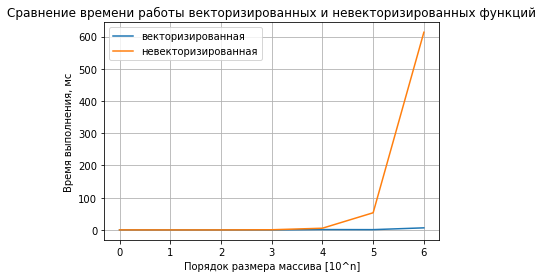

In [7]:
#task6
lgN = 6
N = 10**lgN
timearray = np.empty(lgN+2)
timediff = np.empty(lgN+1)
data = np.ones(N)
timearray[0] = time.time()
for i in range(lgN+1):
    void = expected_reward(data[0:10**i-1])
    timearray[i+1] = time.time()
    timediff[i] = timearray[i+1] - timearray[i]


timearray_py = np.empty(lgN+2)
timediff_py = np.empty(lgN+1)
data = np.ones(N)
timearray_py[0] = time.time()
for i in range(lgN+1):
    void = expected_reward_py(data[0:10**i-1])
    timearray_py[i+1] = time.time()
    timediff_py[i] = timearray_py[i+1] - timearray_py[i]





plt.plot(np.arange(lgN+1), timediff*1000, label = "векторизированная" )
plt.plot(np.arange(lgN+1), timediff_py*1000, label = "невекторизированная" )
plt.legend()
plt.grid()
plt.xlabel("Порядок размера массива [10^n]")
plt.ylabel("Время выполнения, мс")
plt.title("Сравнение времени работы векторизированных и невекторизированных функций")
plt.show()

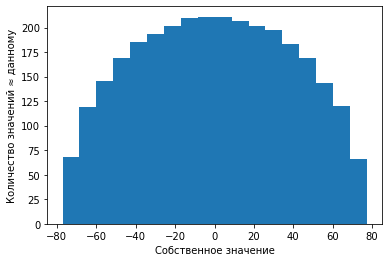

In [8]:
#task7
N = 3000
a = np.random.normal(0,0.5,(N,N))
a = a + np.transpose(a)
eigvals = np.linalg.eigvals(a)

_ = plt.hist(eigvals, bins = 'auto')

plt.xlabel("Собственное значение")
plt.ylabel("Количество значений ≈ данному")

plt.show()

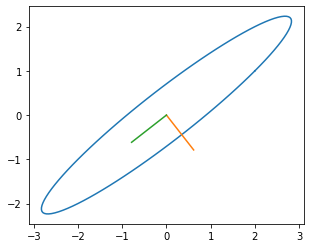

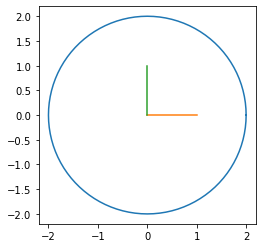

In [9]:
#task8 
def circle_image(M: np.ndarray) -> None:
    init = np.arange(101) / 100 * 2 * np.pi
    coords = [np.cos(init), np.sin(init)]
    coords = np.dot(M, coords)
    plt.plot(coords[0], coords[1])
    A = M @ (M.T)
    vec0 = np.linspace(0,np.linalg.eigh(A)[1][0],20).T
    vec1 = np.linspace(0,np.linalg.eigh(A)[1][1],20).T
    plt.plot(vec0[0],vec0[1])
    plt.plot(vec1[0],vec1[1])
    plt.axis('scaled')
    plt.show()
    pass
circle_image(np.array([[2,2],[1,2]]))
circle_image(np.array([[2,0],[0,2]]))

0.04893196345872318 0.020080455624448934 -0.037622691367188474
-6.654793310822637e-05 0.03953257848715518 0.04785165555481928
0.033053630772452 0.01392220908140261 0.0037192258630698075
0.0023260895055545773 0.0013724276756100183 0.0006152659245704184


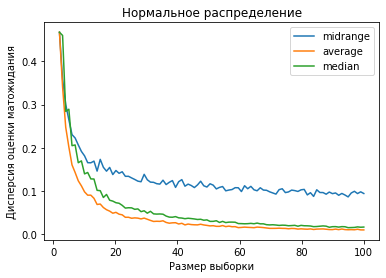

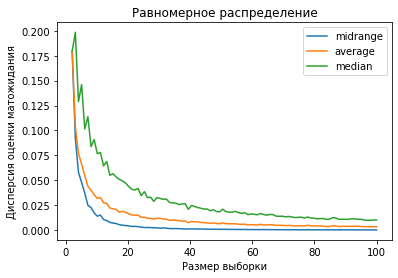

In [10]:
#task9 
#part1
def midrange(a:np.ndarray) -> float:
    return (np.min(a) + np.max(a))/2
def ave(a:np.ndarray) -> float:
    return np.mean(a)
def median(a:np.ndarray) -> float:
    return np.median(a)
#print(median(np.array([1,2,3,4])))

N = 10000
n = 10
m = 0

for N in [10,100,1000,10000]:
    A = np.random.normal(m,1,(N,n))
    est1 = [midrange(A[i]) for i in range(N)]
    est2 = [ave(A[i]) for i in range(N)]
    est3 = [median(A[i]) for i in range(N)]
    print(np.mean(est1), np.mean(est2), np.mean(est3))
    
#part2
N = 1000
ls = np.linspace(2,100,98)
est1var = np.zeros(100)
est2var = np.zeros(100)
est3var = np.zeros(100)

for n in range(2,100):
    A = np.random.normal(m,1,(N,n))
    est1 = np.array([midrange(A[i]) for i in range(N)])
    est2 = np.array([ave(A[i]) for i in range(N)])
    est3 = np.array([median(A[i]) for i in range(N)])
    est1var[n] = est1.var()
    est2var[n] = est2.var()
    est3var[n] = est3.var()
plt.plot(ls,est1var[2:], label = 'midrange')
plt.plot(ls,est2var[2:], label = 'average')
plt.plot(ls,est3var[2:], label = 'median')
plt.legend()
plt.xlabel("Размер выборки")
plt.ylabel("Дисперсия оценки матожидания")
plt.title("Нормальное распределение")
plt.show()

#part3

N = 1000
ls = np.linspace(2,100,98)
est1var = np.zeros(100)
est2var = np.zeros(100)
est3var = np.zeros(100)

for n in range(2,100):
    A = np.random.uniform(-1,1,(N,n))
    est1 = np.array([midrange(A[i]) for i in range(N)])
    est2 = np.array([ave(A[i]) for i in range(N)])
    est3 = np.array([median(A[i]) for i in range(N)])
    est1var[n] = est1.var()
    est2var[n] = est2.var()
    est3var[n] = est3.var()
plt.plot(ls,est1var[2:], label = 'midrange')
plt.plot(ls,est2var[2:], label = 'average')
plt.plot(ls,est3var[2:], label = 'median')
plt.xlabel("Размер выборки")
plt.ylabel("Дисперсия оценки матожидания")
plt.title("Равномерное распределение")
plt.legend()
plt.show()

In [11]:
#task10
import pandas as pd

def count_mentions(tweet: str) -> int:
    return tweet.count("@")

assert count_mentions("some_text @user1 @user2") == 2

df = pd.read_csv("./tweets.csv")
df["num_mentions"] = df["ttext"].apply(count_mentions)
df.head()

,id,tdate,tmane,ttext,ttype,trep,tfav,tstcount,tfol,tfrien,listcount,num_mentions
0,410745723928731648,1386764386,chavdaridi,RT @dianochka6464ru: Россия отмочила! Смотреть...,1,0,1,0,285,11,11,1
1,409580147185315840,1386486491,pifelanybal,Google сменил алгоритм чексуммы в загребании P...,-1,0,0,0,130,100,86,0
2,419794699738570752,1388921830,RomanenkoJulya,"мне надо домой, @RomaRudenko1 не отпускает(",-1,0,0,0,730,28,18,1
3,410625694087909376,1386735769,VizivayuDyavola,"RT @boobear1236969: Линта,я слева:D http://t.c...",1,0,3,0,1959,405,537,1
4,410849586635628545,1386789149,Den_Byhovsky,"@juliasvirid17 я имел ввиду, что для меня спос...",1,0,0,0,3248,61,48,1


In [12]:
#task11
df["tdif"] = - df["tfrien"] + df["tfol"]
df.head()

,id,tdate,tmane,ttext,ttype,trep,tfav,tstcount,tfol,tfrien,listcount,num_mentions,tdif
0,410745723928731648,1386764386,chavdaridi,RT @dianochka6464ru: Россия отмочила! Смотреть...,1,0,1,0,285,11,11,1,274
1,409580147185315840,1386486491,pifelanybal,Google сменил алгоритм чексуммы в загребании P...,-1,0,0,0,130,100,86,0,30
2,419794699738570752,1388921830,RomanenkoJulya,"мне надо домой, @RomaRudenko1 не отпускает(",-1,0,0,0,730,28,18,1,702
3,410625694087909376,1386735769,VizivayuDyavola,"RT @boobear1236969: Линта,я слева:D http://t.c...",1,0,3,0,1959,405,537,1,1554
4,410849586635628545,1386789149,Den_Byhovsky,"@juliasvirid17 я имел ввиду, что для меня спос...",1,0,0,0,3248,61,48,1,3187


In [13]:
#task12
df1 = df.loc[lambda df: df["ttype"] == 1, :]
df1.head()


,id,tdate,tmane,ttext,ttype,trep,tfav,tstcount,tfol,tfrien,listcount,num_mentions,tdif
0,410745723928731648,1386764386,chavdaridi,RT @dianochka6464ru: Россия отмочила! Смотреть...,1,0,1,0,285,11,11,1,274
3,410625694087909376,1386735769,VizivayuDyavola,"RT @boobear1236969: Линта,я слева:D http://t.c...",1,0,3,0,1959,405,537,1,1554
4,410849586635628545,1386789149,Den_Byhovsky,"@juliasvirid17 я имел ввиду, что для меня спос...",1,0,0,0,3248,61,48,1,3187
15,411098495815131136,1386848494,KlimMasha,как всегда круто посидели на химии:) http://t....,1,0,0,0,583,22,37,0,561
17,410406761066405888,1386683571,Alexandrovna_07,"Сегодняшнее творение ,больше половины уже нет ...",1,0,0,0,1155,24,20,0,1131


In [14]:
#task13
def count_unique(df) -> int:
    return np.unique(df["tmane"]).size

print(count_unique(df))

139658


In [15]:
#task15
def count_RT(df) -> int:
    return np.sum(df["ttext"].str.startswith("RT @"))

print(count_RT(df))

36462


In [16]:
#task16
def count_mean_tweet(df) -> int:
    return np.quantile(df["ttext"].str.len(), 0.8)

def count_long_tweets(df) -> int:
    mean = count_mean_tweet(df)
    return np.sum(df["ttext"].str.len() > mean)
print(count_long_tweets(df))

45081


count    2.268340e+05
mean     7.584972e+03
std      2.039972e+04
min      0.000000e+00
25%      4.730000e+02
50%      2.026000e+03
75%      7.562000e+03
max      1.138639e+06
Name: tfol, dtype: float64


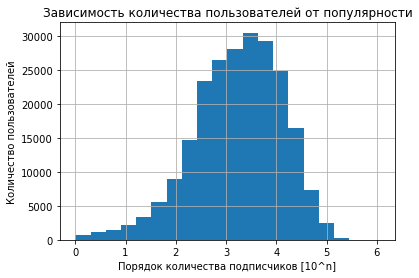

In [17]:
#task14
print(df["tfol"].describe())
hist = (np.log10(df["tfol"]+1)).hist(bins=20)
plt.xlabel("Порядок количества подписчиков [10^n]")
plt.ylabel("Количество пользователей")
plt.title("Зависимость количества пользователей от популярности")
plt.show()

0         2013-12-11
1         2013-12-08
2         2014-01-05
3         2013-12-11
4         2013-12-11
             ...    
226829    2013-12-11
226830    2013-12-08
226831    2013-12-07
226832    2014-01-19
226833    2013-12-11
Name: tdate, Length: 226834, dtype: object


[]

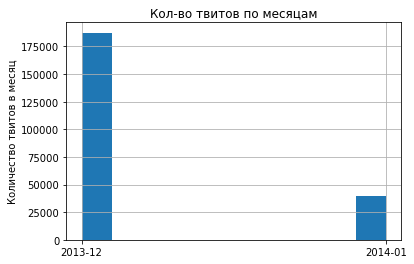

In [18]:
#task17
import datetime

print(df["tdate"].apply(datetime.date.fromtimestamp))
date = df["tdate"].apply(datetime.date.fromtimestamp).apply(str).str[0:7]

hist = date.hist()
plt.ylabel("Количество твитов в месяц")
plt.title("Кол-во твитов по месяцам")
plt.plot()


In [19]:
#task18
import scipy as sp
from scipy.spatial import distance
from scipy import stats



#sp.special.softmax()

def knn_classifier(x_train, y_train, x_test, weight = False, k = 1, p = 1):
    dist = distance.cdist(x_train, x_test, 'minkowski', p = p)
    #indices = np.argsort(dist,axis = 0)
    #indices_cut = indices[0:k]
    if (weight == False):
        indices = np.argsort(dist,axis = 0)
        indices_cut = indices[0:k]
        return stats.mode(y_train[indices_cut]).mode
    else:
        w = sp.special.softmax(-dist,axis = 0)
        maybe_0 = np.sum(((1-y_train).T * w.T).T, axis = 0)
        maybe_1 = np.sum((y_train.T * w.T).T,axis = 0)
        return (np.sign(maybe_1 - maybe_0)+1) // 2
    
np.random.seed(42)

l = 500

x_train = np.random.normal(size = (l,10))
y_train = np.random.randint(2, size = l)
x_test = np.random.normal(size=(100,10))


assert np.all(np.isclose(knn_classifier(x_train, y_train, x_test, p=1, weight=False, k=3),
          np.array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
                   0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
                   1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
                   1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1])))

assert np.all(np.isclose(
    knn_classifier(x_train, y_train, x_test, k=1, weight=True),
    np.array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1])
))